### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Demostration video: Create a decision tree

#### *This is a possible solution to the demostration video.* 

In this tutorial I’ll demonstrate step by step how to fit a classification decision tree model on the data set from the Telcom National study.

A decision tree is a type of ML algorithm. It is a tree-like model of questions and decisions with their possible consequences, outcomes, resources costs, and utility. It is a graphic representation of various alternative solutions available at a certain point in time. Simply stated, the decision tree, which is based on how humans reason, is created by answering several questions that are continued after each affirmative or negative answer until a final choice can be made.

For example, the decision-making process for deciding whether to stay living at your current location or move to another country may lead you to consider what to do with your possessions, and then, for example, to a range of more or less affordable (and reliable) options.

Consider the following scenario:

Telcom National (TN) wants to determine if a customer is likely to churn; in other words, they want to be able to predict the likelihood of a new customer 'churning' or leaving a specific service provider. As a data analyst, we will explore the decision tree model and how we can utilise it to get a satisfactory answer.

# 

# 1. Prepare your workstation

In [41]:
# Import all necessary libraries.
import pandas as pd 
import numpy as np 
import scipy as scp
import sklearn
from sklearn import metrics

# Provides classes and functions to estimate many different statistical methods.
import statsmodels.api as sm  

# Note: Helps split data into sets to create BLR.
from imblearn.over_sampling import SMOTE  
from sklearn.model_selection import train_test_split

# Note: Indicates situations that aren’t necessarily exceptions.
import warnings  
warnings.filterwarnings('ignore')  

# Read the provided CSV file/data set.
df = pd.read_csv('../data/customer_data_v1.csv')  

# Print a summary of the DataFrame to sense-check it.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            41188 non-null  int64  
 1   Occupation     41188 non-null  object 
 2   Status         41188 non-null  object 
 3   Edu            41188 non-null  object 
 4   House          41188 non-null  object 
 5   Loan           41188 non-null  object 
 6   Comm           41188 non-null  object 
 7   Month          41188 non-null  object 
 8   DOW            41188 non-null  object 
 9   Duration       41188 non-null  int64  
 10  Campaign       41188 non-null  int64  
 11  PosDays        41188 non-null  int64  
 12  Last_out       41188 non-null  object 
 13  Var_rate       41188 non-null  float64
 14  Price_idx      41188 non-null  float64
 15  Conf_idx       41188 non-null  float64
 16  Month_rate     41188 non-null  float64
 17  Quarterly_emp  41188 non-null  float64
 18  Target

# 

# 2. Update variables

In [42]:
# Specify the DataFrame column and add/determine the values.
df['Edu'].value_counts() 

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: Edu, dtype: int64

In [43]:
df

,Age,Occupation,Status,Edu,House,Loan,Comm,Month,DOW,Duration,Campaign,PosDays,Last_out,Var_rate,Price_idx,Conf_idx,Month_rate,Quarterly_emp,Target
0,44,blue-collar,married,basic.4y,yes,no,cellular,aug,thu,210,1,999,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,cellular,nov,fri,138,1,999,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,yes,no,cellular,jun,thu,339,3,6,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,cellular,apr,fri,185,2,999,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,yes,no,cellular,aug,fri,137,1,3,success,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,no,yes,telephone,jun,thu,222,1,999,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,basic.4y,no,no,telephone,may,thu,196,2,999,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,yes,yes,telephone,may,wed,62,3,999,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,no,yes,telephone,oct,tue,200,2,999,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0


In [44]:
# Update all the details of the education column.
df.loc[df['Edu'].str.contains('basic'),'Edu' ] = 'pre-school'
df.loc[df['Edu'].str.contains('university'),'Edu' ] = 'uni'
df.loc[df['Edu'].str.contains('high'),'Edu' ] = 'high-school'
df.loc[df['Edu'].str.contains('professional') ,'Edu'] = 'masters'
df.loc[df['Edu'].str.contains('illiterate'),'Edu' ] = 'other'
df.loc[df['Edu'].str.contains('unknown'),'Edu' ] = 'other'

# Display all the unique values/check changes.
df['Edu'].unique() 

array(['pre-school', 'other', 'uni', 'high-school', 'masters'],
      dtype=object)

# 

# 3. Create dummy variables

In [45]:
# Name new DataFrame and convert categorical variables to dummy variables.
cat_vars=['Occupation','Status','Edu','House','Loan',
          'Comm','Month','DOW','Last_out']

# Use the for loop keyword to specify what actions to
# apply to all the 'var' items.
# Specify what needs to apply to all the variables.
for var in cat_vars:  
    # Specify details of the categorical list.
    cat_list = pd.get_dummies(df[var], prefix=var)  
    # Indicate the joining of the DataFrames.
    df = df.join(cat_list) 

df_fin = df.drop(cat_vars, axis=1) 

# We have already specified the column names. 
# This code snippet is only used in the video for explanation purposes.
# Specify the column names:
# cat_vars=['Occupation','Status','Edu','House','Loan',
#           'Comm','Month','DOW','Last_out']

# Set a temporary DataFrame and add values.
df_vars = df.columns.values.tolist()  

# Indicate what columns are kept.
to_keep = [i for i in df_vars if i not in cat_vars] 

# Define new DataFrame.
df_fin = df[to_keep]  

# Print the column.
df_fin.columns.values 

array(['Age', 'Duration', 'Campaign', 'PosDays', 'Var_rate', 'Price_idx',
       'Conf_idx', 'Month_rate', 'Quarterly_emp', 'Target',
       'Occupation_admin.', 'Occupation_blue-collar',
       'Occupation_entrepreneur', 'Occupation_housemaid',
       'Occupation_management', 'Occupation_retired',
       'Occupation_self-employed', 'Occupation_services',
       'Occupation_student', 'Occupation_technician',
       'Occupation_unemployed', 'Occupation_unknown', 'Status_divorced',
       'Status_married', 'Status_single', 'Status_unknown',
       'Edu_high-school', 'Edu_masters', 'Edu_other', 'Edu_pre-school',
       'Edu_uni', 'House_no', 'House_unknown', 'House_yes', 'Loan_no',
       'Loan_unknown', 'Loan_yes', 'Comm_cellular', 'Comm_telephone',
       'Month_apr', 'Month_aug', 'Month_dec', 'Month_jul', 'Month_jun',
       'Month_mar', 'Month_may', 'Month_nov', 'Month_oct', 'Month_sep',
       'DOW_fri', 'DOW_mon', 'DOW_thu', 'DOW_tue', 'DOW_wed',
       'Last_out_failure', 'Last_out

# 

# 4. Balance the data

In [46]:
# Create a DataFrame to use as df_fin and replace missing values with zero.
df_fin = df_fin.fillna(0)  

# Select necessary columns. 
nec_cols = [ 'Status_divorced', 'Status_married',
            'Status_single', 'Status_unknown', 
            'Edu_high-school', 'Edu_masters', 
            'Edu_other', 'Edu_pre-school', 
            'Edu_uni', 'House_no', 'House_unknown',
            'House_yes', 'Loan_no', 'Loan_unknown', 
            'Loan_yes', 'DOW_fri', 'DOW_mon']

X = df_fin[nec_cols]
y = df_fin['Target']

# Create a new DataFrame and apply SMOTE as the target variable is not balanced.
os = SMOTE(random_state=0)  

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=0)

# Specify column values.
columns = X_train.columns  
# Specify the new data sets.
os_data_X,os_data_y=os.fit_resample(X_train, y_train)  

# Create two DataFrames for X and one for y.
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['Target'])

# Print/check the DataFrame.
print("Length of oversampled data is ",len(os_data_X))
os_data_y

Length of oversampled data is  51134


,Target
0,0
1,0
2,0
3,0
4,0
...,...
51129,1
51130,1
51131,1
51132,1


In [47]:
# Determine if values in a column are balanced.
os_data_y['Target'].value_counts()  

0    25567
1    25567
Name: Target, dtype: int64

# 

# 5. Build and fit the decision tree model

In [57]:
# Import the DecisionTreeClassifier class from sklearn. 
from sklearn.tree import DecisionTreeClassifier  

# Create a classification decision tree classifier object as dtc. 
dtc = DecisionTreeClassifier(criterion='gini',
                             max_depth=4,
                             random_state=1)

# Train the decision tree classifier.
dtc = dtc.fit(os_data_X, os_data_y) 

# Predict the response for the test data set.
y_pred = dtc.predict(X_test)  

# 

# 6. Determine the accuracy of the model

In [58]:
# Import scikit-learn metrics module for accuracy calculation.
from sklearn.metrics import confusion_matrix

# Use the print() function to display the confusion matrix results.
print(confusion_matrix(y_test, y_pred))

# Metrics for accuracy: (TP + TN)/(TP + FP + TN + FN).
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)) 

# Metrics for precision: TP/(TP + FP).
print("Precision:",metrics.precision_score(y_test, y_pred)) 

# Metrics for recall: TP/(FN + TP).
print("Recall:",metrics.recall_score(y_test, y_pred)) 

[[6324 4657]
 [ 634  742]]
Accuracy: 0.5718216395565267
Precision: 0.13743285793665494
Recall: 0.5392441860465116


> Extra code snippets for clarity

In [59]:
# Import Seaborn for visualisation.
import seaborn as sns

# Plot the confusion_matrix.
sns.heatmap(confusion_matrix, annot=True, fmt='g')

ValueError: Must pass 2-d input. shape=()

In [60]:
# Create a DataFrame to display the confusion matrix. 
pd.DataFrame(confusion_matrix, index=['observed_notchurn','observed_churn'],
columns=['predicted_notchurn', 'predicted_churn'])

,predicted_notchurn,predicted_churn
observed_notchurn,<function confusion_matrix at 0x7ff24b36dc10>,<function confusion_matrix at 0x7ff24b36dc10>
observed_churn,<function confusion_matrix at 0x7ff24b36dc10>,<function confusion_matrix at 0x7ff24b36dc10>


In [61]:
# Import the necessary package.
from sklearn.metrics import classification_report  

# Print a report on the model's accuracy.
print(classification_report(y_test, y_pred))  

              precision    recall  f1-score   support

           0       0.91      0.58      0.71     10981
           1       0.14      0.54      0.22      1376

    accuracy                           0.57     12357
   macro avg       0.52      0.56      0.46     12357
weighted avg       0.82      0.57      0.65     12357



# 

# 7. Visualise the model

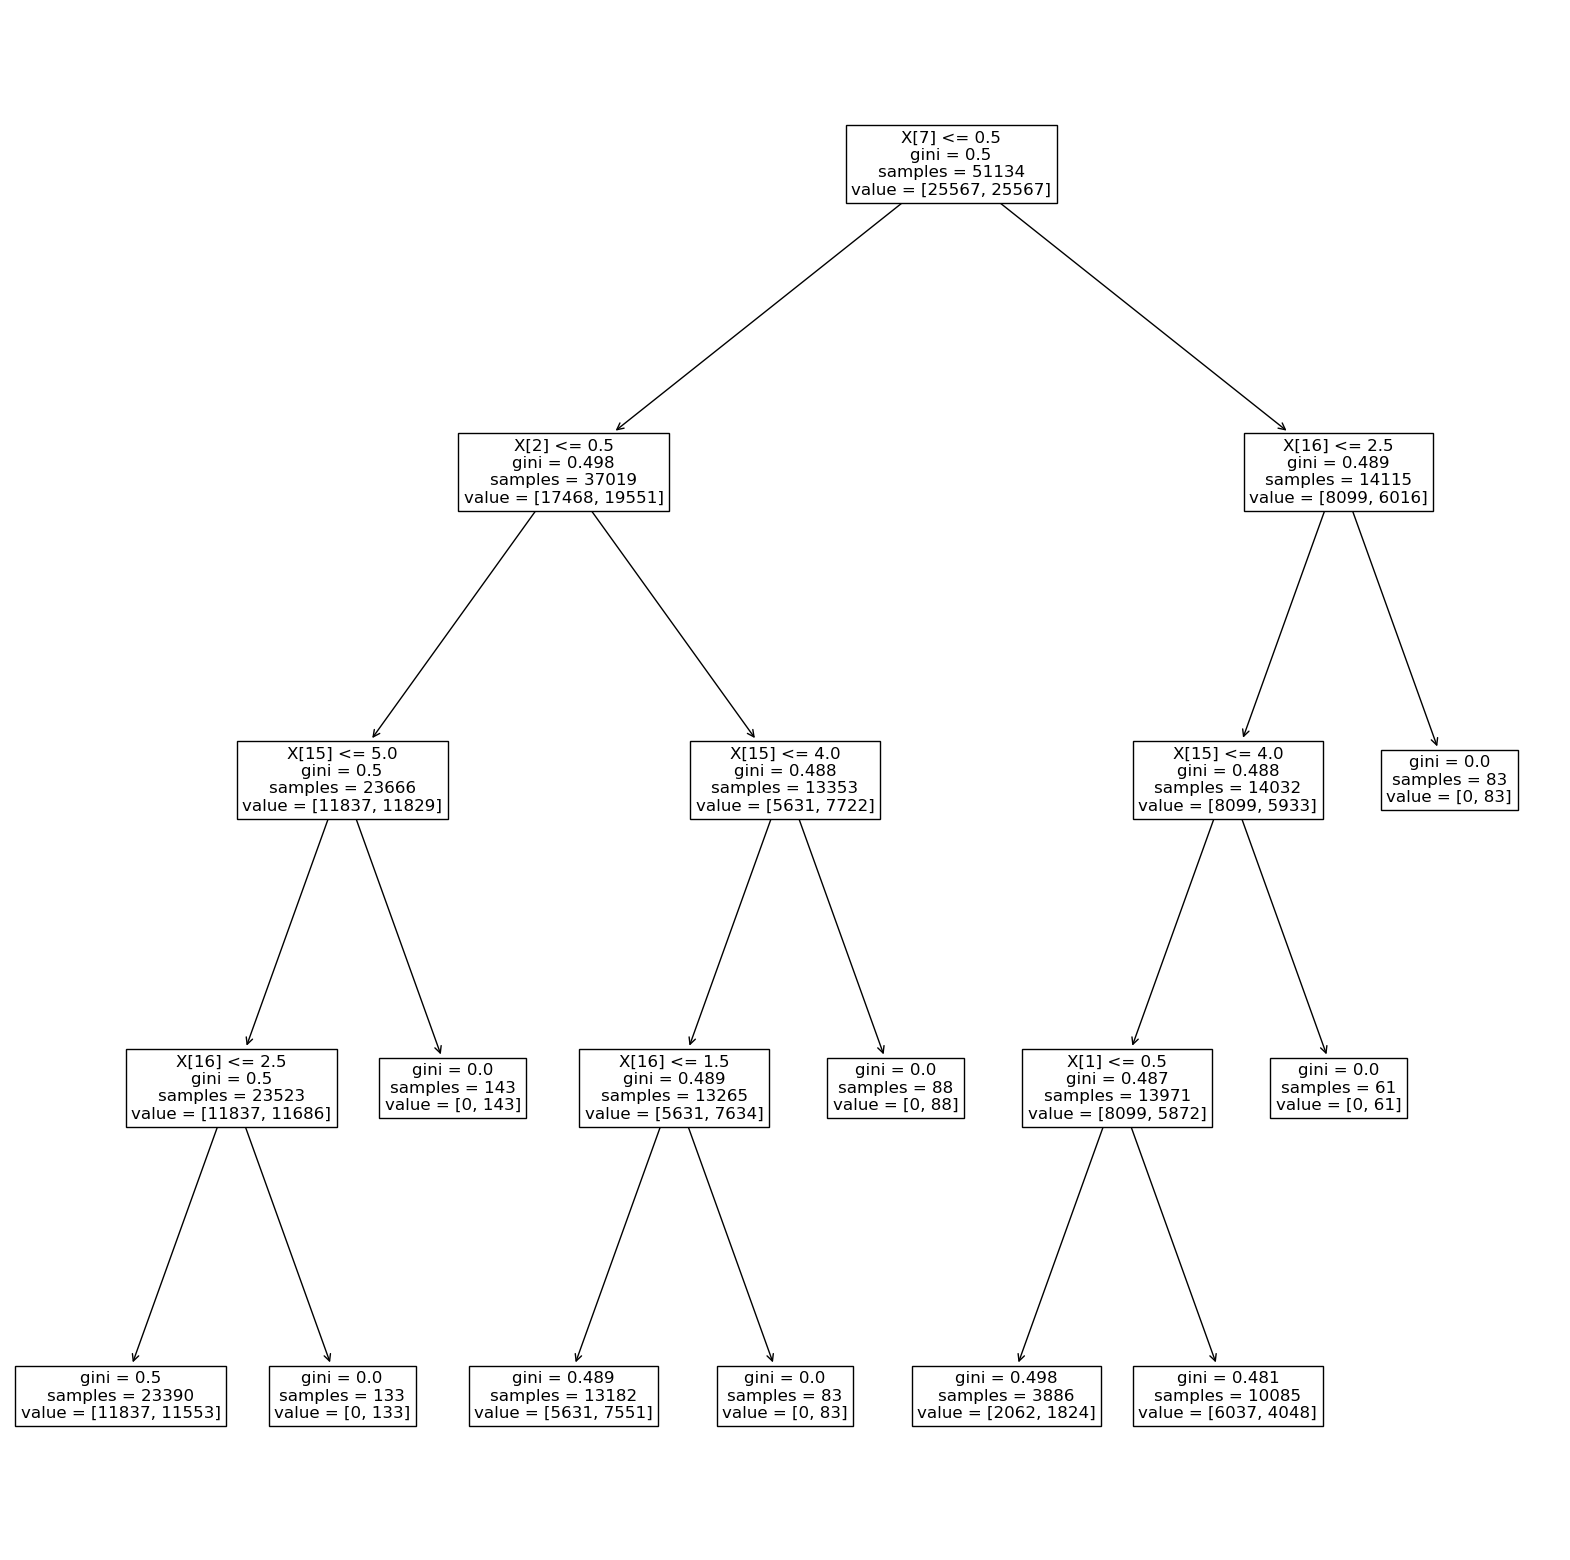

In [56]:
# Import matplotlib to create a visualisation and the tree package from sklearn.
import matplotlib.pyplot as plt 
from sklearn import tree

# Plot the decision tree to create the visualisation.
fig, ax = plt.subplots(figsize=(20, 20))
tree.plot_tree(dtc, fontsize=12)

# Print the plot with plt.show().
plt.show()  

# 

# 8. Conclusion

What does the decision tree tell us? What can we report back to Telcom National?
> Accuracy and recall indicate a good model fit. Although an accuracy of 73% is not as good as 82% (BLR model), we still get it more right than wrong. 

# 